In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_data = pd.read_csv('walmart_dataset/train.csv')
features_data = pd.read_csv('walmart_dataset/features.csv')
stores_data = pd.read_csv('walmart_dataset/stores.csv')
test_data = pd.read_csv('walmart_dataset/test.csv')

In [4]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
stores_data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


Merging dataset

In [7]:
X=pd.merge(stores_data, pd.merge(train_data,features_data))
X_test=pd.merge(stores_data, pd.merge(test_data,features_data))

Check for missing values and attribute types

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     421570 non-null  bool   
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [9]:
#calculating total number of cells

total_cells_X =X.shape[0] * X.shape[1]
total_cells_Xtest = X_test.shape[0] * X_test.shape[1]

missing_values_count_X = X.isnull().sum()
missing_values_count_Xtest = X_test.isnull().sum()

#calculating percentage
missing_value_percentage_X = (missing_values_count_X/X.shape[0]) * 100
missing_value_percentage_Xtest = (missing_values_count_Xtest/X_test.shape[0]) * 100

#displaying the missing values
print("Missing values in X:")
print(missing_value_percentage_X)

print("\nMissing values in X_test:")
print(missing_value_percentage_Xtest)

Missing values in X:
Store            0.000000
Type             0.000000
Size             0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

Missing values in X_test:
Store            0.000000
Type             0.000000
Size             0.000000
Dept             0.000000
Date             0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1        0.129493
MarkDown2       24.879198
MarkDown3        8.542203
MarkDown4       11.200723
MarkDown5        0.000000
CPI             33.165890
Unemployment    33.165890
dtype: float64


Correlation

Text(0.5, 1.0, 'Correlation Matrix')

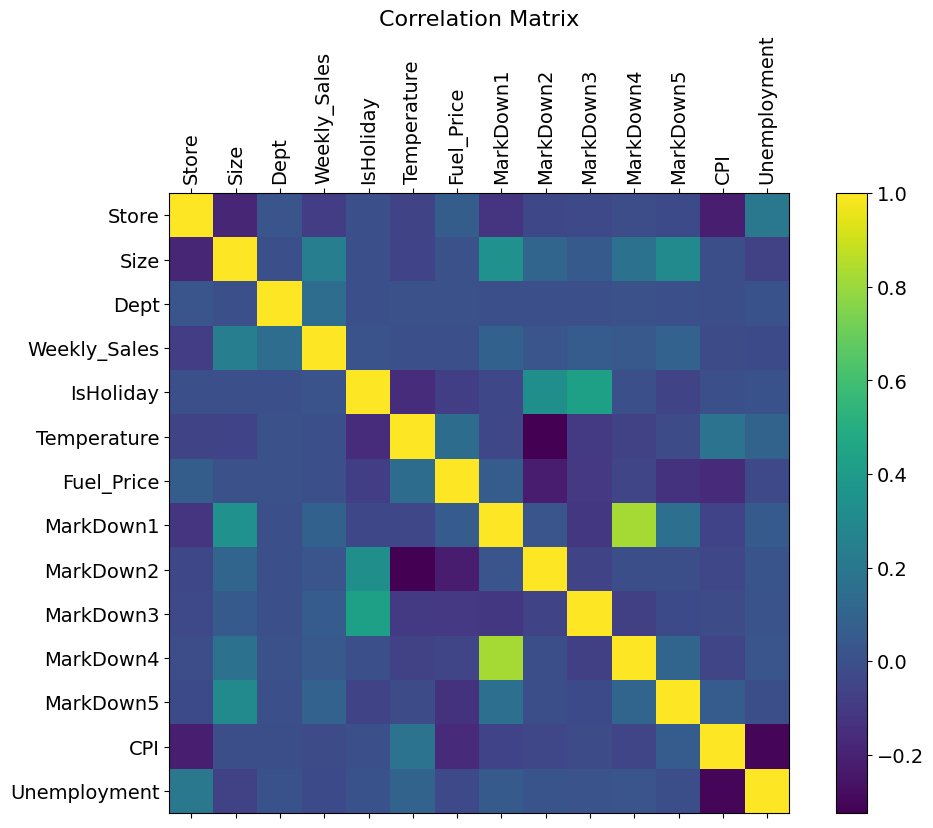

In [10]:
# ...existing code...
numeric_X = X.select_dtypes(include=['number', 'bool'])
f = plt.figure(figsize=(12, 8))
plt.matshow(numeric_X.corr(), fignum=f.number)
plt.xticks(range(numeric_X.shape[1]), numeric_X.columns, fontsize=14, rotation=90)
plt.yticks(range(numeric_X.shape[1]), numeric_X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
# ...existing code...

In [11]:
X.Type.value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

Data cleaning and Preprocessing

In [12]:
#dropping markdown columns

X =X.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
Xtest = X_test.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

Handling missing values

In [13]:
Xtest.Unemployment.fillna(Xtest.Unemployment.mean(), inplace=True)

Xtest.CPI.fillna(Xtest.CPI.mean(),inplace=True)

C:\Users\hiran\AppData\Local\Temp\ipykernel_9356\3267285593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xtest.Unemployment.fillna(Xtest.Unemployment.mean(), inplace=True)
C:\Users\hiran\AppData\Local\Temp\ipykernel_9356\3267285593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Encode categorical attributes and boolean attributes

In [14]:
#mapping categorical attributes

type_mapping={'A':2,'B':1,'C':0}
X['Type']=X['Type'].map(type_mapping)
Xtest['Type']=Xtest['Type'].map(type_mapping)


#mapping boolean attributes

X['IsHoliday'] = X['IsHoliday'].astype(int)
Xtest['IsHoliday'] = Xtest['IsHoliday'].astype(int)

Encode 'Date' as cyclical features

In [15]:
def extract_year_and_month(dateString):
    year =dateString[:4]
    month = dateString[5:7]
    return year, month

#Encode for train data

year_values = []
month_values = []
for date in X.Date.values:
    year, month = extract_year_and_month(date)
    year_values.append(year)
    month_values.append(month)
    
X['Year'] = year_values
X['Month'] = month_values

#Encode for test data

year_values= []
month_values = []

for date in Xtest.Date.values:
    year, month = extract_year_and_month(date)
    year_values.append(year)
    month_values.append(month)
    
Xtest['Year'] = year_values
Xtest['Month'] = month_values


In [16]:
def sin_transform(values):
    return np.sin(2 * np.pi * values / 12)

def cos_transform(values):
    return np.cos(2 * np.pi * values / 12)

In [17]:
X['MonthSin'] = sin_transform(X.Month.values.astype('int32'))
X['MonthCos'] = cos_transform(X.Month.values.astype('int32'))

Xtest['MonthSin'] = sin_transform(Xtest.Month.values.astype('int32'))
Xtest['MonthCos'] = cos_transform(Xtest.Month.values.astype('int32'))

In [18]:
X=X.drop(['Date', 'Month', 'Year'], axis=1)
Xtest=Xtest.drop(['Date', 'Month', 'Year'], axis=1)

In [19]:
print(X.shape)
print(Xtest.shape)

(421570, 12)
(115064, 11)


Extraction Validation dataset

In [20]:
val_ratio = 0.1
validation_indexes = np.random.choice(len(X), (int(np.floor(len(X) * val_ratio)),), replace=False)
Xval = X.loc[validation_indexes]
X.drop(validation_indexes,axis=0)

#Getting targets

y = pd.DataFrame(X.Weekly_Sales, columns=['Weekly_Sales'])

yval = pd.DataFrame(Xval.Weekly_Sales, columns=['Weekly_Sales'])
X=X.drop(columns=['Weekly_Sales'])
Xval = Xval.drop(columns=['Weekly_Sales'])

*Normalizing the data*

In [21]:
def standardize(dataframe):
    for col in dataframe.select_dtypes(include='number').columns:
        if col != 'Store': # Exclude store id
            dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()
            
X_not_standard =X.copy()
Xval_not_standard = Xval.copy()
Xtest_not_standard = Xtest.copy()

standardize(X)
standardize(Xval)
standardize(Xtest)


Metrics Calculation and Definition

In [22]:
def rmse(predicted, target):
    if len(predicted) != len(target):
        return("error: lengths of predicted and target do not match")
    else:
        n = len(predicted)
        return round(np.sqrt(np.sum(np.power(predicted - target, 2)) / n), 2)
    
def mse(predicted, target):
    if len(predicted) != len(target):
        return("error: lengths of predicted and target do not match")
    else:
        n = len(predicted)
        return round(np.sum(np.power(predicted - target, 2)) / n, 2)
    
def rss(predicted, target):
    # Residual sum of squares
    return np.sum(np.power(predicted - target, 2))

def tss(target):
    # Total sum of squares
    return np.sum(target - np.mean(target)) 

def r2(predicted, target):
    return round(1 - rss(predicted, target) / tss(target), 2)

Linear Regression Model, Lasso Regression ,random forest

In [23]:
#Linear Regression

from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X.values, y.values)
linreg_predicted = linReg.predict(Xval.values)


In [24]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X.values, y.values)
lasso_predicted = lasso.predict(Xval.values)

In [25]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=30)
randomForest.fit(X.values, y.values)
randomForest_predict = randomForest.predict(Xval.values)

c:\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Comparing the models and analysis the results

In [26]:
from sklearn.metrics import r2_score

predictor_name = ['Linear Regression', 'Lasso Regression', 'RandomForest']
perf_metrics = ['RMSE', 'R2']

# Flatten  for metric functions
linreg_predicted = linreg_predicted.ravel()
lasso_predicted = lasso_predicted.ravel()

yval_flat = yval.values.ravel()


result_values = [
    {"RMSE": rmse(linreg_predicted, yval_flat), "R2": r2_score(yval_flat, linreg_predicted)},
    {"RMSE": rmse(lasso_predicted, yval_flat), "R2": r2_score(yval_flat, lasso_predicted)},
    {"RMSE": rmse(randomForest_predict, yval_flat), "R2": r2_score(yval_flat, randomForest_predict)}
]

result_table = pd.DataFrame(result_values, index=predictor_name)
result_table

,RMSE,R2
Linear Regression,21548.43,0.087658
Lasso Regression,21548.43,0.087657
RandomForest,2830.74,0.984256


In [27]:
# Predict weekly sales using the trained Random Forest model
test_predictions = randomForest.predict(Xtest.values)

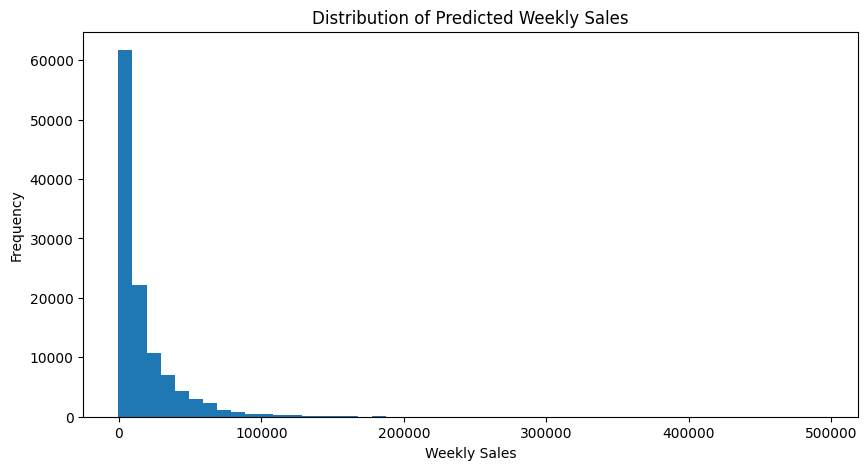

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(test_predictions, bins=50)
plt.title('Distribution of Predicted Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

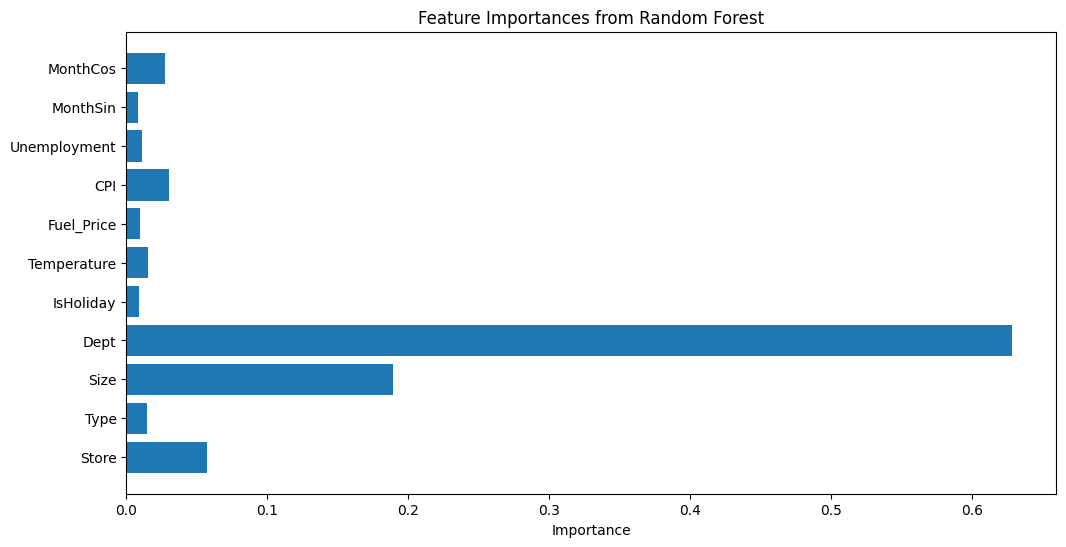

In [29]:
importances = randomForest.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(12,6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [30]:
# Show first 5 predictions with their features
example_results = Xtest_not_standard.copy()
example_results['Predicted_Weekly_Sales'] = test_predictions
example_results.head()

,Store,Type,Size,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MonthSin,MonthCos,Predicted_Weekly_Sales
0,1,2,151315,1,0,55.32,3.386,223.462779,6.573,-0.5,0.866025,24157.925667
1,1,2,151315,1,0,61.24,3.314,223.481307,6.573,-0.5,0.866025,25253.065667
2,1,2,151315,1,0,52.92,3.252,223.512911,6.573,-0.5,0.866025,25117.444000
3,1,2,151315,1,1,56.23,3.211,223.561947,6.573,-0.5,0.866025,27777.368667
4,1,2,151315,1,0,52.34,3.207,223.610984,6.573,-0.5,0.866025,27995.133667


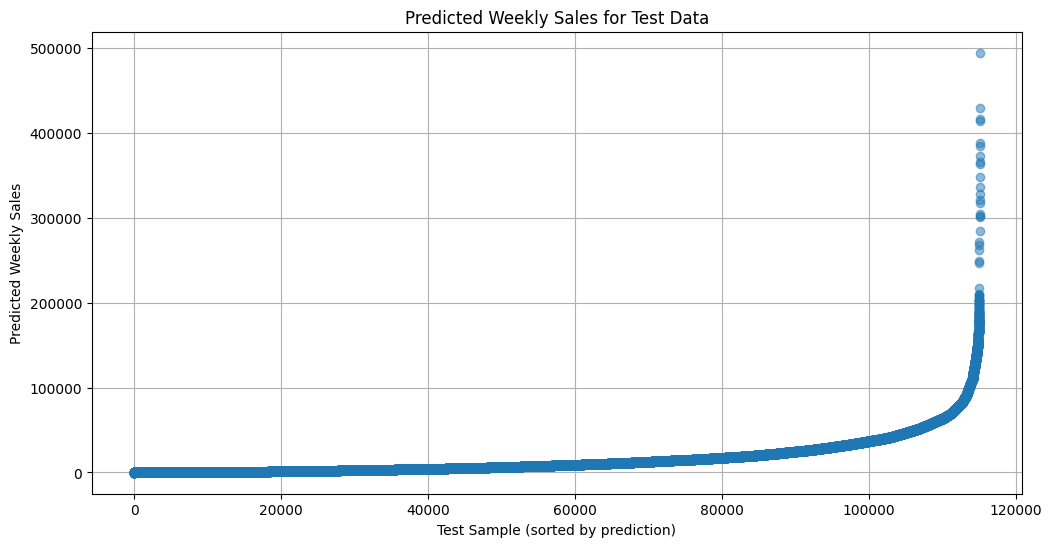

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sort predictions for better visualization
sorted_preds = np.sort(test_predictions)

plt.figure(figsize=(12,6))
plt.plot(sorted_preds, marker='o', linestyle='', alpha=0.5)
plt.title('Predicted Weekly Sales for Test Data')
plt.xlabel('Test Sample (sorted by prediction)')
plt.ylabel('Predicted Weekly Sales')
plt.grid(True)
plt.show()

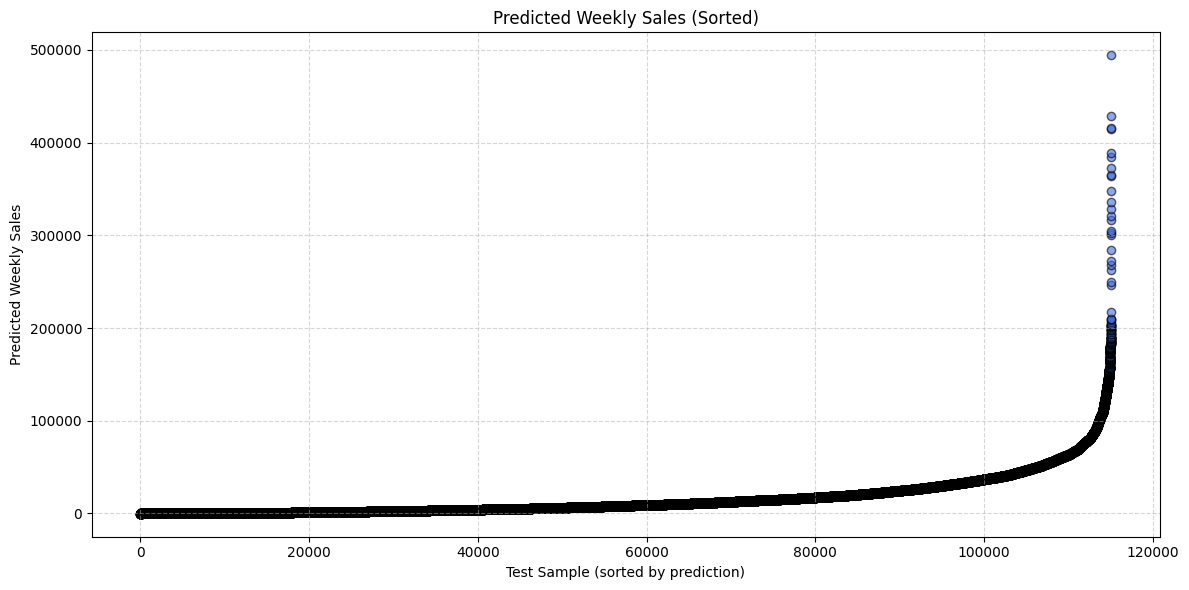

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sort predictions for a clear trend line
sorted_preds = np.sort(test_predictions)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(sorted_preds)), sorted_preds, alpha=0.6, color='royalblue', edgecolor='k')
plt.title('Predicted Weekly Sales (Sorted)')
plt.xlabel('Test Sample (sorted by prediction)')
plt.ylabel('Predicted Weekly Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [33]:
# Combine predicted sales with week (Date) from test_data
predicted_sales_df = test_data[['Date']].copy()
predicted_sales_df['Predicted_Weekly_Sales'] = test_predictions

# Show the first few rows
print(predicted_sales_df.head())

         Date  Predicted_Weekly_Sales
0  2012-11-02            24157.925667
1  2012-11-09            25253.065667
2  2012-11-16            25117.444000
3  2012-11-23            27777.368667
4  2012-11-30            27995.133667


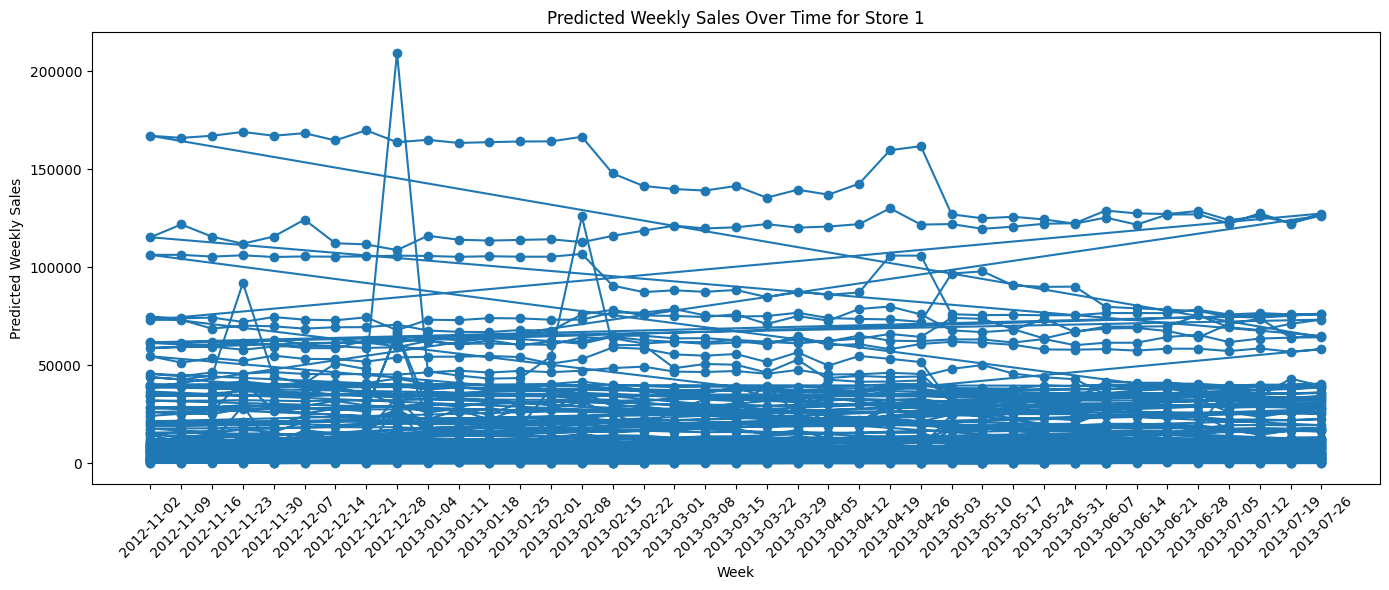

In [ ]:
# If you want to see the trend for a specific store or department, filter accordingly
# Example: for the first store in test_data
store_id = test_data['Store'].iloc[0]
store_sales = predicted_sales_df[test_data['Store'] == store_id]

plt.figure(figsize=(14,6))
plt.plot(store_sales['Date'], store_sales['Predicted_Weekly_Sales'], marker='o')
plt.title(f'Predicted Weekly Sales Over Time for Store {store_id}')
plt.xlabel('Week')
plt.ylabel('Predicted Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()